In [1]:
import numpy as np
import cv2
import glob
import matplotlib.pyplot as plt
%matplotlib inline

# Part 1: Camera Calibration

## Camera Calibration Example Images

Text(0.5,1,'Example Image 3')

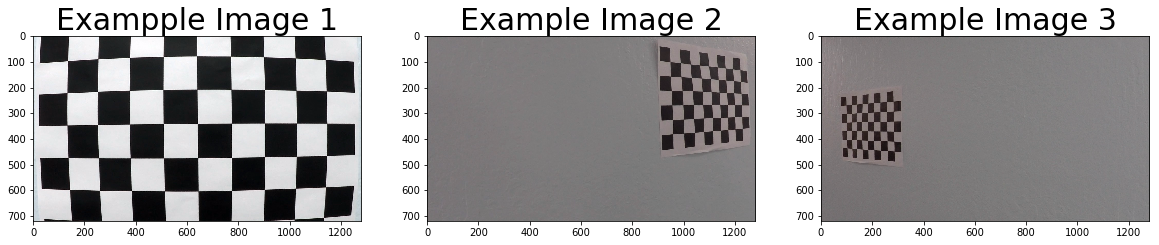

In [2]:
#Make a list of calibration images
images = glob.glob('camera_cal/calibration*.jpg')

#load images
img1= cv2.imread(images[0])
img2= cv2.imread(images[5])
img3= cv2.imread(images[10])

#plot images
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,10))
ax1.imshow(img1)
ax1.set_title('Exampple Image 1', fontsize=30)
ax2.imshow(img2)
ax2.set_title('Example Image 2', fontsize=30)
ax3.imshow(img3)
ax3.set_title('Example Image 3', fontsize=30)


## 1.Find Chessboard Corners in Images

Text(0.5,1,'Chessboard Corners Image 10')

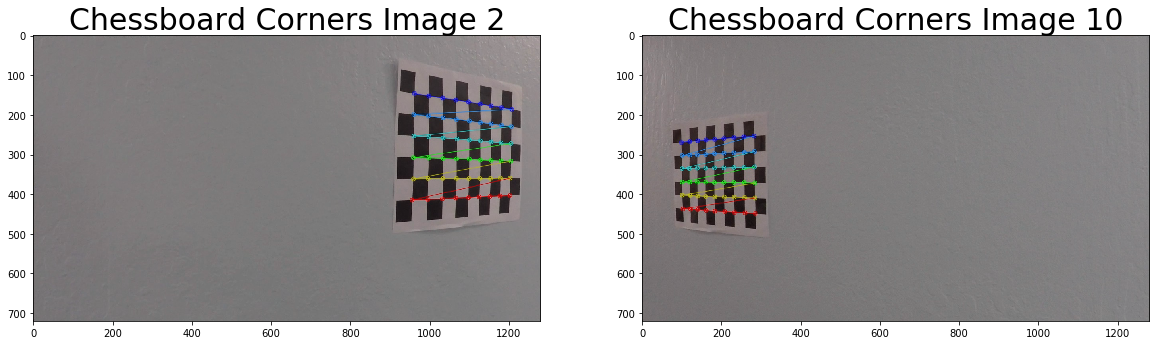

In [8]:
# prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
objp = np.zeros((6*9,3), np.float32)
objp[:,:2] = np.mgrid[0:9, 0:6].T.reshape(-1,2)

# Arrays to store object points and image points from all the images.
objpoints = [] # 3d points in real world space
imgpoints = [] # 2d points in image plane.

# Step through the list and search for chessboard corners
for idx, fname in enumerate(images):
    img = cv2.imread(fname)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Find the chessboard corners
    ret, corners = cv2.findChessboardCorners(gray, (9,6), None)

    # If found, add object points, image points
    if ret == True:
        objpoints.append(objp)
        imgpoints.append(corners)

        # Draw and display the corners
        img = cv2.drawChessboardCorners(img, (9,6), corners, ret)
        write_name = 'corners_found'+str(idx)+'.jpg'
        cv2.imwrite("output_images/" + write_name, img)
        cv2.imshow('img', img)
        cv2.waitKey(500)

cv2.destroyAllWindows()

#plot images
img_corner_2 = cv2.imread("output_images/corners_found2.jpg")
img_corner_10 = cv2.imread("output_images/corners_found10.jpg")
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
ax1.imshow(img_corner_2 )
ax1.set_title('Chessboard Corners Image 2', fontsize=30)
ax2.imshow(img_corner_10)
ax2.set_title('Chessboard Corners Image 10', fontsize=30)

## 2. Find Camera Matrix and Distortion Coefficients

Text(0.5,1,'Undistorted Image')

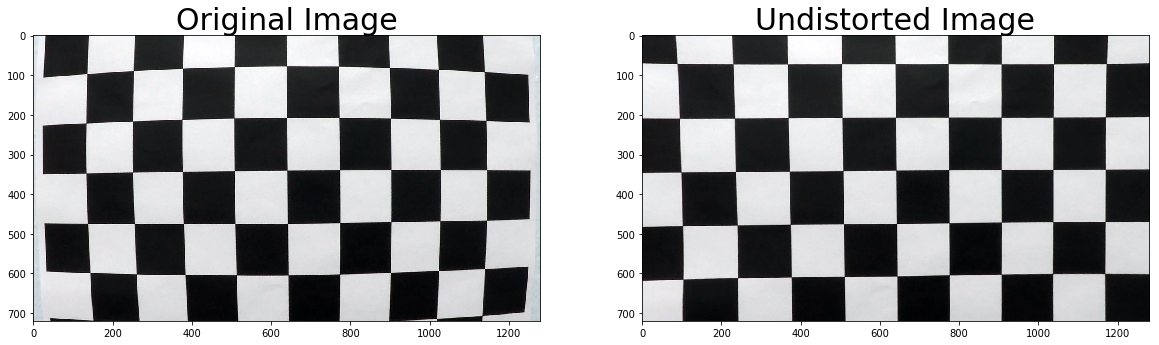

In [9]:
# Test undistortion on an image
img = cv2.imread('camera_cal/calibration1.jpg')
img_size = (img.shape[1], img.shape[0])

# Do camera calibration given object points and image points
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, img_size,None,None)


dst = cv2.undistort(img, mtx, dist, None, mtx)
cv2.imwrite('calibration_wide/test_undist.jpg',dst)

# Visualize undistortion
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
ax1.imshow(img)
ax1.set_title('Original Image', fontsize=30)
ax2.imshow(dst)
ax2.set_title('Undistorted Image', fontsize=30)